# ADVERT PREDICTION

**Objective:** to create a model that predicts if a person will click on an ad based on their features

# Importing the libraries analysis and visualisation

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# The Data

In [44]:
data = pd.read_csv('advertising.csv') #imports the data

In [45]:
data.head() #to check the head of the data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [46]:
data.info() #to check the file for null values and know the size of the data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [47]:
data.describe() #to calc the mean,std,max, min and percentile

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [48]:
data.columns # to see the Variables

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

# Exploratory Data Analysis 

Text(0.5, 0, 'Age')

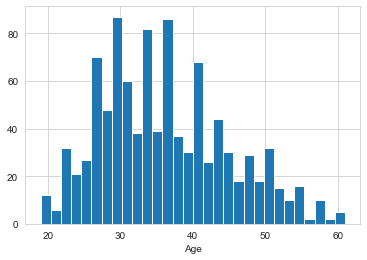

In [49]:
sns.set_style('whitegrid')       #an histogram of the age
data['Age'].hist(bins=30)
plt.xlabel('Age')

**Observation**: highest tendencies are at age 30 and 40

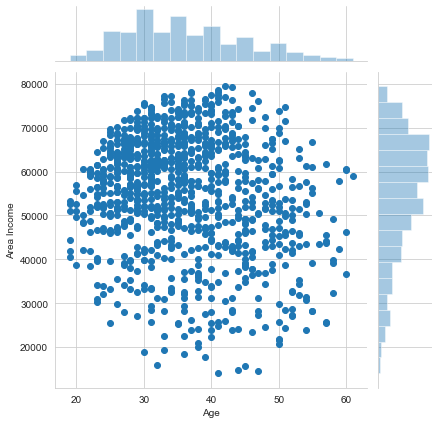

In [50]:
sns.jointplot(x='Age', y='Area Income', data = data) #Jointplot of Area income and Age 

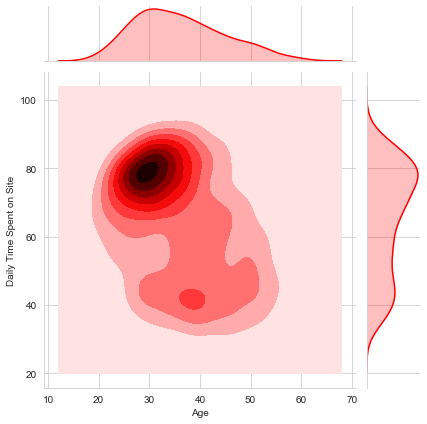

In [51]:
sns.jointplot(x='Age', y='Daily Time Spent on Site', data=data, color='red', kind='kde')   
#distribution of daily time spent on site and Age

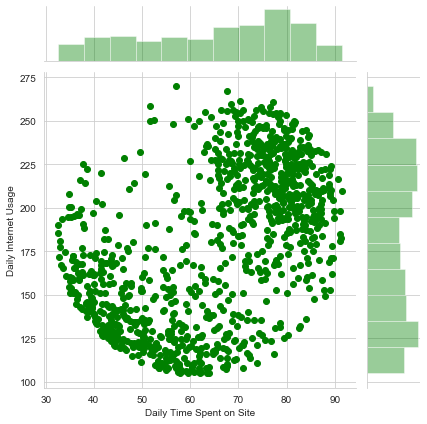

In [52]:
sns.jointplot(x='Daily Time Spent on Site',y='Daily Internet Usage',data=data,color='green') 
#comparison of Daily time spent on site and daily internal usage

C:\Users\5559\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\5559\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\5559\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\5559\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


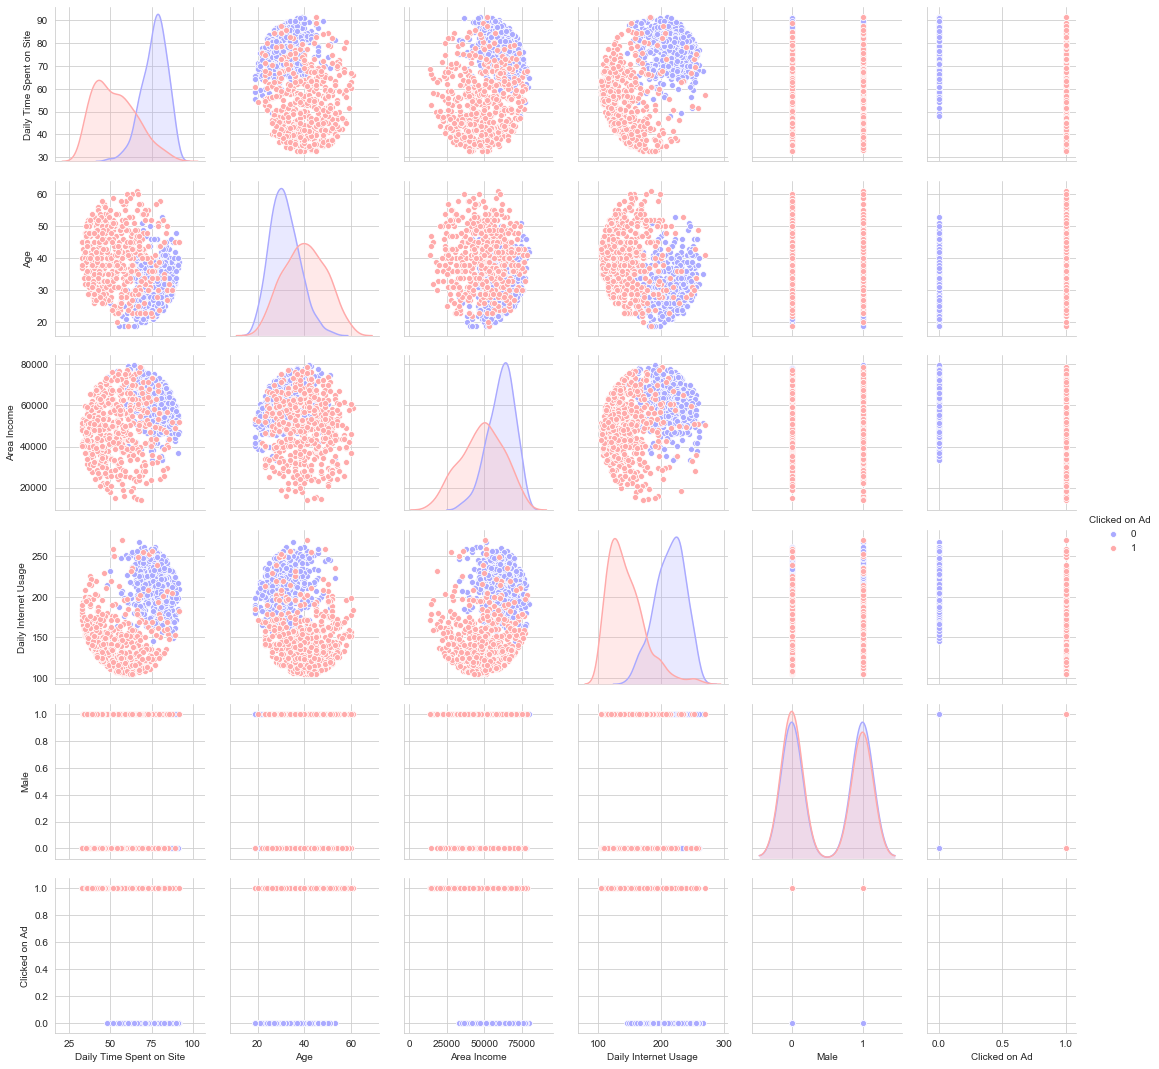

In [53]:
sns.pairplot(data,hue='Clicked on Ad',palette='bwr')  #using pairplot to check the relationship between the variables

 # Training and Testing the Data

**Spliting the data into training and testing dataset**

In [60]:
data.columns #to see the variables

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [61]:
y = data['Clicked on Ad'] # the target variable

In [62]:
X = data[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage','Male']]   
# variables to train on

In [63]:
#importing train_test_split from Sklearn.model_selection to split the data into training and testing sets 

from sklearn.model_selection import train_test_split

In [64]:
#the model is trained on training set and evaluated on the test set
#with the test size= 0.3 and random_state =100

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Creating and Training the Model

In [65]:
#importing LinearRegression from sklearn.linear_model

from sklearn.linear_model import LogisticRegression

In [66]:
lm = LogisticRegression() #to create an instance LogisticRegression() model

In [67]:
lm.fit(X_train,y_train)

C:\Users\5559\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

# **Prediction and Evaluations**

In [71]:
predictions = lm.predict(X_test)      #to predict the perfomance of x_set of the data

In [75]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [76]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       162
           1       0.96      0.86      0.91       168

    accuracy                           0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330

[[156   6]
 [ 24 144]]


# Conclusion and Recommendation

**Initial Objective:** to create a model that predicts if a person will click on an ad based on their features

With 91% accuracy rate and 9% error rate, the model can be termed accurate. Although, the advertising platform variable also needs to be considered